### 1-Module 2: Portfolio Optimization

##### Lab 1: Efficient Frontier

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Load industry return data
ind30 = round(erk.get_ind_returns(), ndigits=4) #rounded because of floating points decimals
ind30.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


Sharpe Ratio

In [ ]:
# Calculate Sharpe ratios for industry portfolios 1996-2000
# Assume rf = 3%, periods = 12 (monthly)
risk_free = .03
periods = 12
returns_9620 = ind30['1996':'2000']

# returns_96 = ind30.loc["1996"]
# annual_returns_96 = (1+ returns_96).prod() - 1
# annual_returns_96

mean_annual9620 = returns_9620.mean()*periods

# volatility_9620 = returns_9620.std() #monthly volatility
volatility_annual9620 = returns_9620.std()*np.sqrt(periods)

sharpe_ratio = (mean_annual9620 - risk_free)/volatility_annual9620
sharpe_ratio.head()

# ind30.loc['1996']

Food     0.176950
Beer     0.251336
Smoke    0.316520
Games    0.212776
Books    0.177038
Hshld    0.198994
Clths    0.260490
Hlth     0.175441
Chems    0.198265
Txtls    0.193399
Cnstr    0.209327
Steel    0.294559
FabPr    0.228659
ElcEq    0.239357
Autos    0.227697
Carry    0.222366
Mines    0.297353
Coal     0.472961
Oil      0.195109
Util     0.154483
Telcm    0.206950
Servs    0.302233
BusEq    0.339758
Paper    0.202264
Trans    0.184983
Whlsl    0.181145
Rtail    0.204359
Meals    0.189059
Fin      0.218584
Other    0.224504
dtype: float64


Food     0.543429
Beer     0.534265
Smoke    0.387022
Games    0.279167
Books    0.893257
dtype: float64

Estimate expected returns (annualized) and the covariance matrix for your assets (usually a subset of industries, or all of them).

In [37]:
# Pick a few industries (let’s say, 4 assets: ‘Food’, ‘Beer’, ‘Smoke’, ‘Coal’ for example).
chosen_assets = ['Food', 'Beer', 'Smoke', 'Coal']
# Create a vector of weights (e.g. [0.25, 0.25, 0.25, 0.25] for equal weighting).

weights = [.25,.25,.25,.25] #

In [ ]:
portfolio_return = np.dot(weights,mean_annual9620[chosen_assets])
portfolio_return

np.float64(0.22462)

In [63]:
#volatility

## NOT CORRECT WHEN HAVING MORE THAN ONE ASSET
# portfolio_vol = np.dot(weights,volatility_annual9620[chosen_assets])
# portfolio_vol

#First, covariance
cov_matrix = returns_9620[chosen_assets].cov()* periods  # get annualized cov
print(cov_matrix)
# Diagonal elements: Each asset’s variance (i.e., the squared standard deviation), so for asset 
# Off-diagonal elements: The covariance between each pair of assets (

#Second, the volatility

portfolio_vol = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights))) #double weight multiplication to get a scalar, not a vector.
#w_T x Cov x w
print(portfolio_vol)
print(volatility_annual9620[chosen_assets])


           Food      Beer     Smoke      Coal
Food   0.031311  0.028549  0.024730  0.000320
Beer   0.028549  0.063170  0.016305  0.020736
Smoke  0.024730  0.016305  0.100185 -0.008793
Coal   0.000320  0.020736 -0.008793  0.223692
0.19073064901734138
Food     0.176950
Beer     0.251336
Smoke    0.316520
Coal     0.472961
dtype: float64


###### Efficient Frontier Concept

In [85]:
#Example for 2 assets
portfolio_sharpe =[]
rets =[]
vols =[]
weights_list = np.arange(0, 1.1, 0.1)

for w in weights_list:
  weights = [w,1-w] #pos1 is asset 1, pos2 is asset 2
  chosen_assets = ["Food","Beer"]
  portfolio_return = np.dot(weights,mean_annual9620[chosen_assets])
  cov_matrix = returns_9620[chosen_assets].cov()*periods
  portfolio_vol = np.sqrt(np.dot(weights,np.dot(cov_matrix,weights)))
  sharpe_ratio = (portfolio_return-risk_free)/portfolio_vol
  rets.append(portfolio_return)
  vols.append(portfolio_vol)
  portfolio_sharpe.append(sharpe_ratio)

# Find the optimal weight
max_sharpe_idx = np.argmax(portfolio_sharpe)  # Get index of maximum Sharpe ratio
optimal_weight = weights_list[max_sharpe_idx]  # Get corresponding weight

print(f"Optimal weight for Food: {optimal_weight:.2f}")
print(f"Optimal weight for Beer: {1-optimal_weight:.2f}")
print(f"Maximum Sharpe ratio: {portfolio_sharpe[max_sharpe_idx]:.4f}")

Optimal weight for Food: 0.60
Optimal weight for Beer: 0.40
Maximum Sharpe ratio: 0.5948


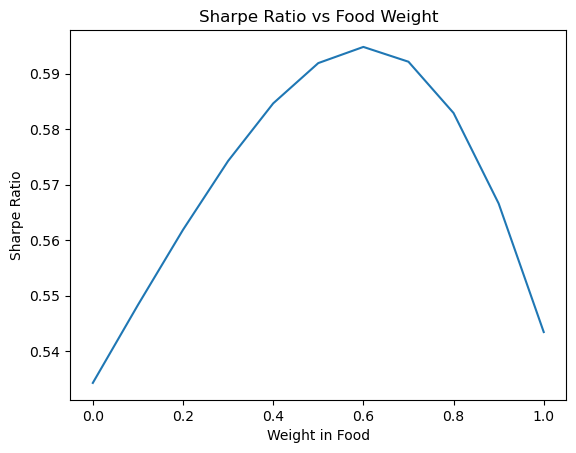

In [86]:
plt.plot(weights_list, portfolio_sharpe)
plt.xlabel('Weight in Food')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio vs Food Weight')
plt.show()

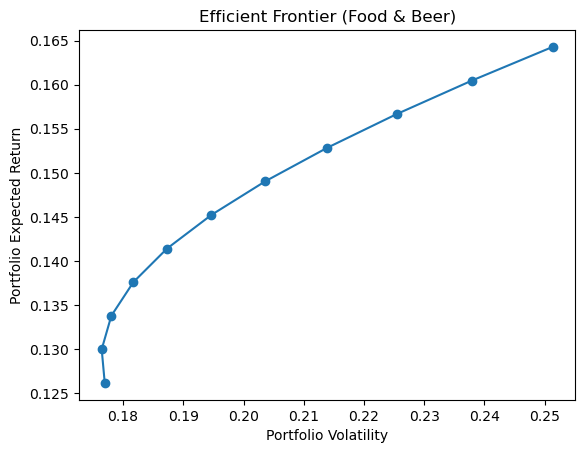

In [87]:
plt.plot(vols, rets, marker='o')
plt.xlabel('Portfolio Volatility')
plt.ylabel('Portfolio Expected Return')
plt.title('Efficient Frontier (Food & Beer)')
plt.show()

3 assets

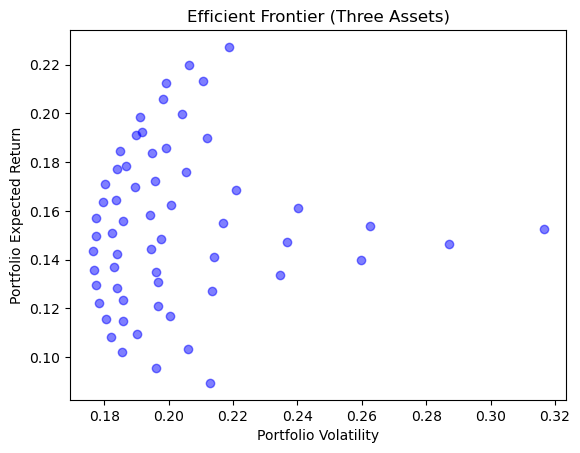

In [ ]:
chosen_assets = ['Smoke', 'Fin', 'Games']
portfolio_returns = []
portfolio_vols = []
weights_list = []

for w1 in np.arange(0, 1.1, 0.1):
    for w2 in np.arange(0, 1.1-w1, 0.1):
        w3 = 1 - w1 - w2
        if w3 < 0 or w3 > 1:
            continue
        weights = np.array([w1, w2, w3])
        cov_matrix = returns_9620[chosen_assets].cov() * periods
        mean_ret = mean_annual9620[chosen_assets]
        port_ret = np.dot(weights, mean_ret)
        port_vol = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
        weights_list.append(weights)
        portfolio_returns.append(port_ret)
        portfolio_vols.append(port_vol)
        sharpe_ratio = (port_ret-risk_free)/port_vol
        portfolio_sharpe.append(sharpe_ratio)

plt.scatter(portfolio_vols, portfolio_returns, c='blue', alpha=0.5)
plt.xlabel("Portfolio Volatility")
plt.ylabel("Portfolio Expected Return")
plt.title("Efficient Frontier (Three Assets)")
plt.show()

C:\Users\franc\AppData\Local\Temp\ipykernel_40812\4063709784.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  Sharpe[i, j] = (port_ret - risk_free) / port_vol


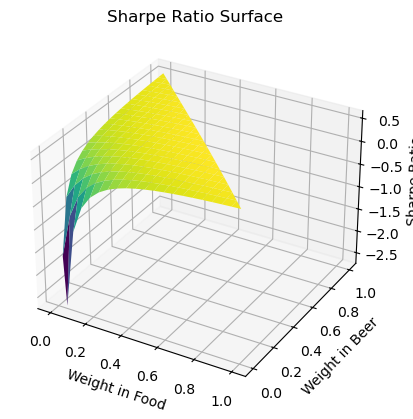

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

chosen_assets = ['Food', 'Beer']
mean_ret = mean_annual9620[chosen_assets]
cov_matrix = returns_9620[chosen_assets].cov() * periods

# Create grid of weights for two assets
W1, W2 = np.meshgrid(np.arange(0, 1.01, 0.05), np.arange(0, 1.01, 0.05))
Sharpe = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w1 = W1[i, j]
        w2 = W2[i, j]
        if w1 + w2 > 1:
            Sharpe[i, j] = np.nan  # Invalid combo: can't invest >100%
            continue
        weights = np.array([w1, w2])
        port_ret = np.dot(weights, mean_ret)
        port_vol = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
        Sharpe[i, j] = (port_ret - risk_free) / port_vol

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Sharpe, cmap='viridis', edgecolor='none')
ax.set_xlabel('Weight in Food')
ax.set_ylabel('Weight in Beer')
ax.set_zlabel('Sharpe Ratio')
ax.set_title('Sharpe Ratio Surface')
plt.show()
